In [4]:
import pandas as pd

# Read CSV files
df_2011 = pd.read_csv('data/2011_unemployed.csv')
df_2021 = pd.read_csv('data/2021_unemployed.csv')

# Calculate new columns
df_2011['2011'] = df_2011['Never worked and long term unemployed'] / df_2011['All usual residents aged 16-74 ']
df_2021['2021'] = df_2021['Never worked and long term unemployed'] / df_2021['All usual residents aged 16+']

# Merge datasets on 'LSOA code'
merged_df = pd.merge(df_2011[['LSOA code', '2011']], df_2021[['LSOA code', '2021']], on='LSOA code', how='left')

# Calculate 'change' column
merged_df['change'] = merged_df['2021'] - merged_df['2011']

# Fill missing values with column means
merged_df['2011'].fillna(merged_df['2011'].mean(), inplace=True)
merged_df['2021'].fillna(merged_df['2021'].mean(), inplace=True)
merged_df['change'].fillna(merged_df['change'].mean(), inplace=True)

# Show the processed DataFrame
print("Processed DataFrame:\n", merged_df)

merged_df.to_csv('description_data/unemployed.csv', index=False)

Processed DataFrame:
       LSOA code      2011      2021    change
0     E01000001  0.017199  0.027286  0.010087
1     E01000002  0.009197  0.032258  0.023061
2     E01000003  0.046279  0.048000  0.001721
3     E01000005  0.124191  0.157840  0.033649
4     E01032739  0.013388  0.062783  0.049395
...         ...       ...       ...       ...
4989  E01035718  0.046512  0.058210  0.011699
4990  E01035719  0.066986  0.098553  0.031568
4991  E01035720  0.055991  0.057223  0.001232
4992  E01035721  0.086311  0.117908  0.031597
4993  E01035722  0.027595  0.054429  0.026834

[4994 rows x 4 columns]


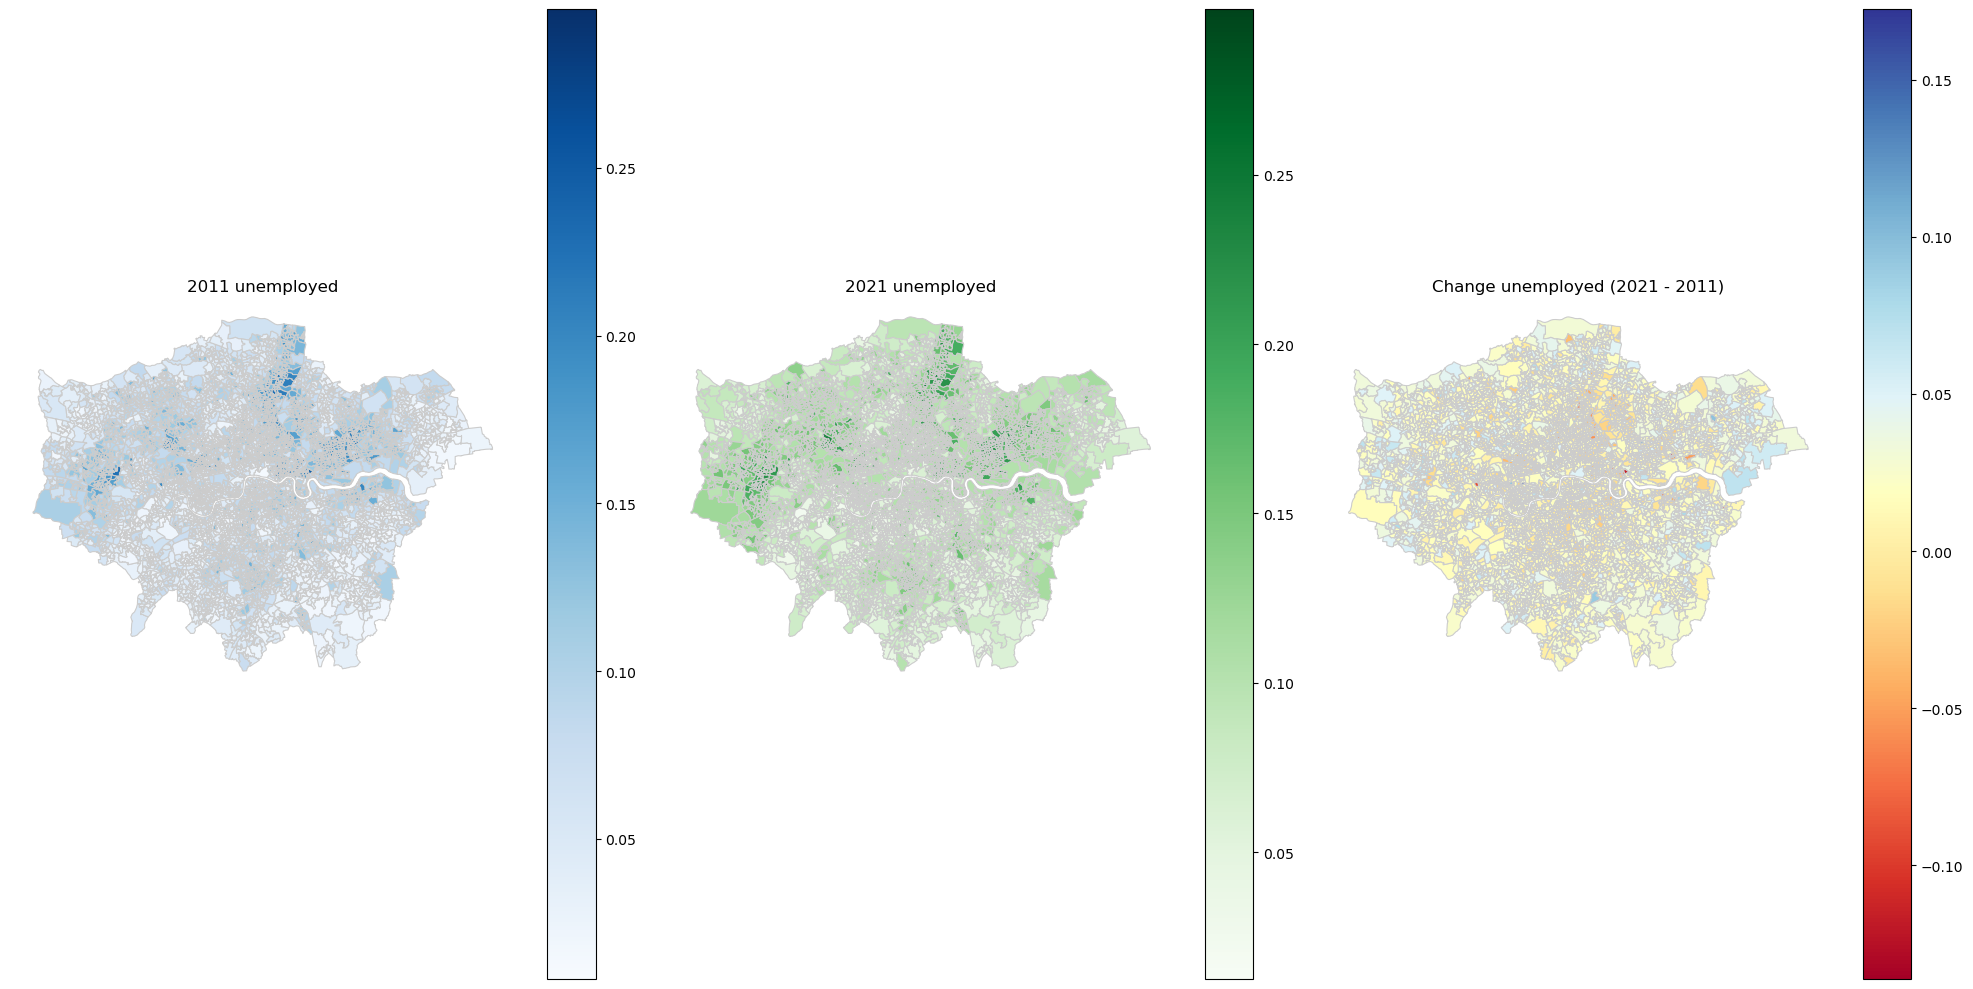

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取shapefile
gdf = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp')

# 合并shapefile和处理好的数据
gdf = gdf.merge(merged_df, left_on='LSOA11CD', right_on='LSOA code', how='left')

# 填充shapefile中缺失的值
gdf['2011'].fillna(gdf['2011'].mean(), inplace=True)
gdf['2021'].fillna(gdf['2021'].mean(), inplace=True)
gdf['change'].fillna(gdf['change'].mean(), inplace=True)

# 设置地图的投影
gdf = gdf.to_crs(epsg=4326)

# 创建子图
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# 绘制2011年的地图
gdf.plot(column='2011', cmap='Blues', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
axes[0].set_title('2011 unemployed')

# 绘制2021年的地图
gdf.plot(column='2021', cmap='Greens', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
axes[1].set_title('2021 unemployed')

# 绘制变化的地图
gdf.plot(column='change', cmap='RdYlBu', linewidth=0.8, ax=axes[2], edgecolor='0.8', legend=True)
axes[2].set_title('Change unemployed (2021 - 2011)')

# 隐藏坐标轴
for ax in axes:
    ax.set_axis_off()

# 显示地图
plt.tight_layout()
plt.show()

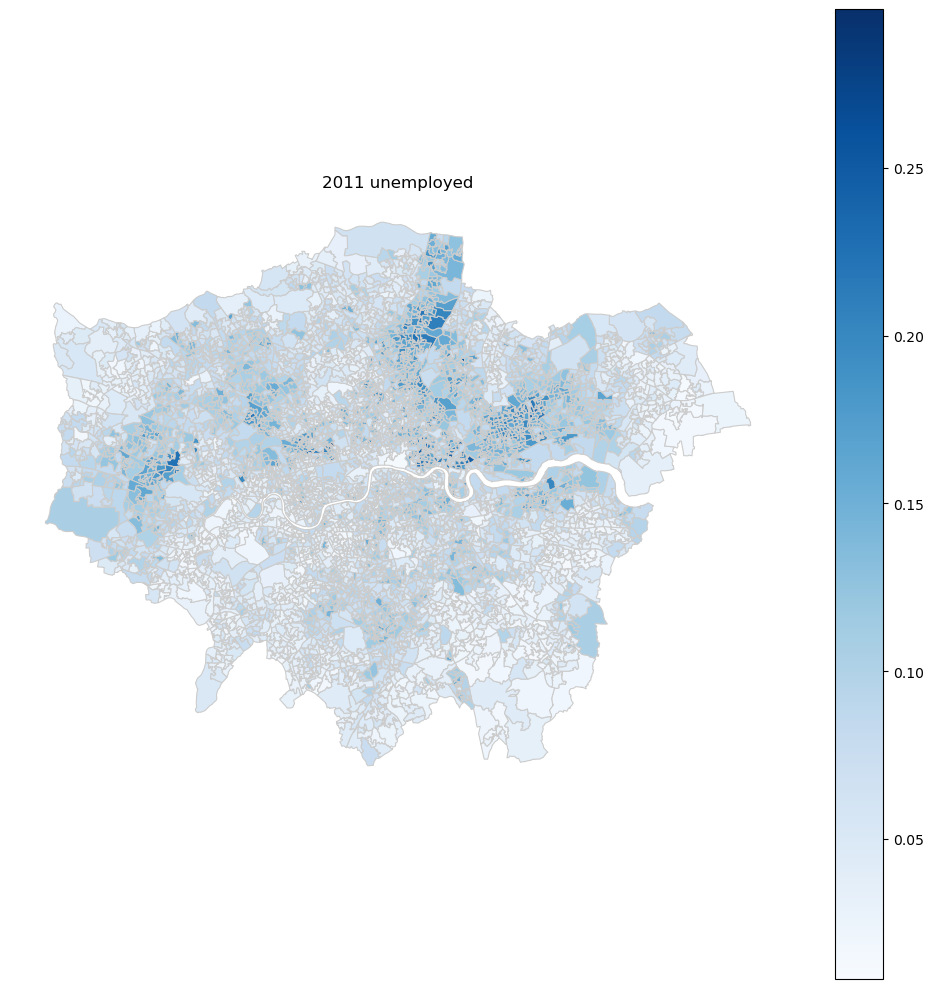

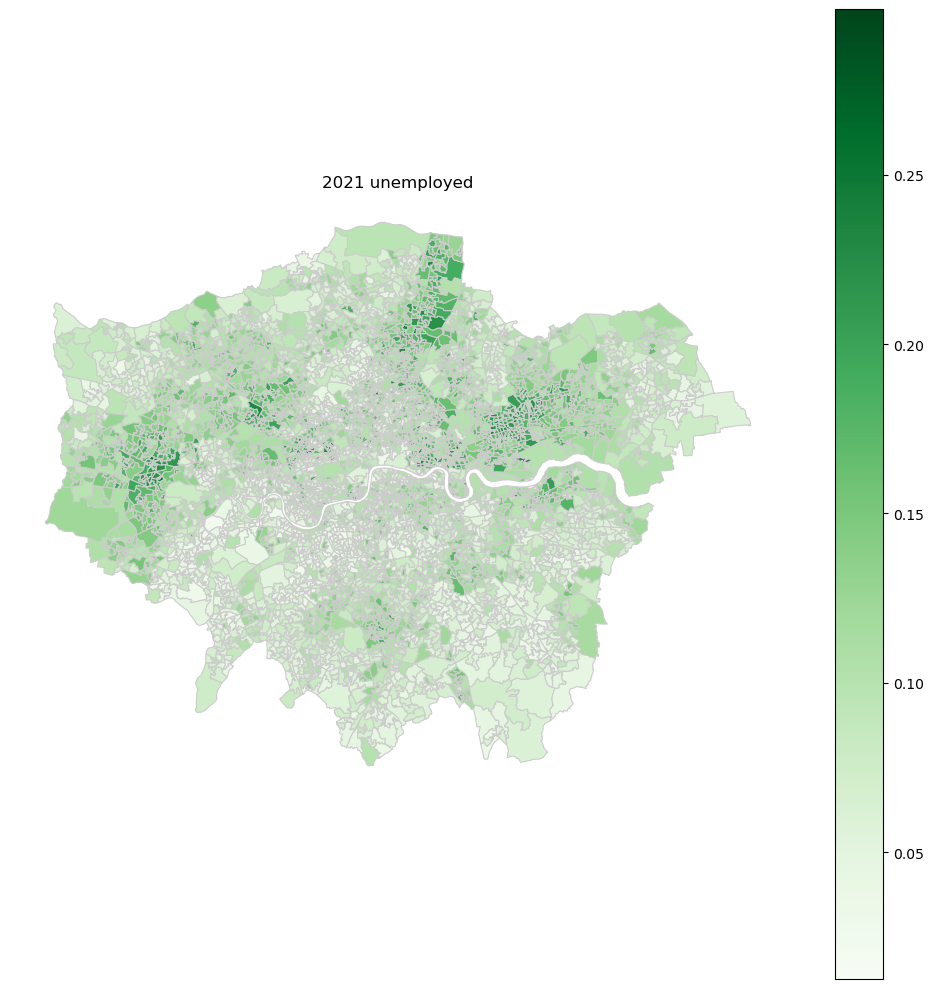

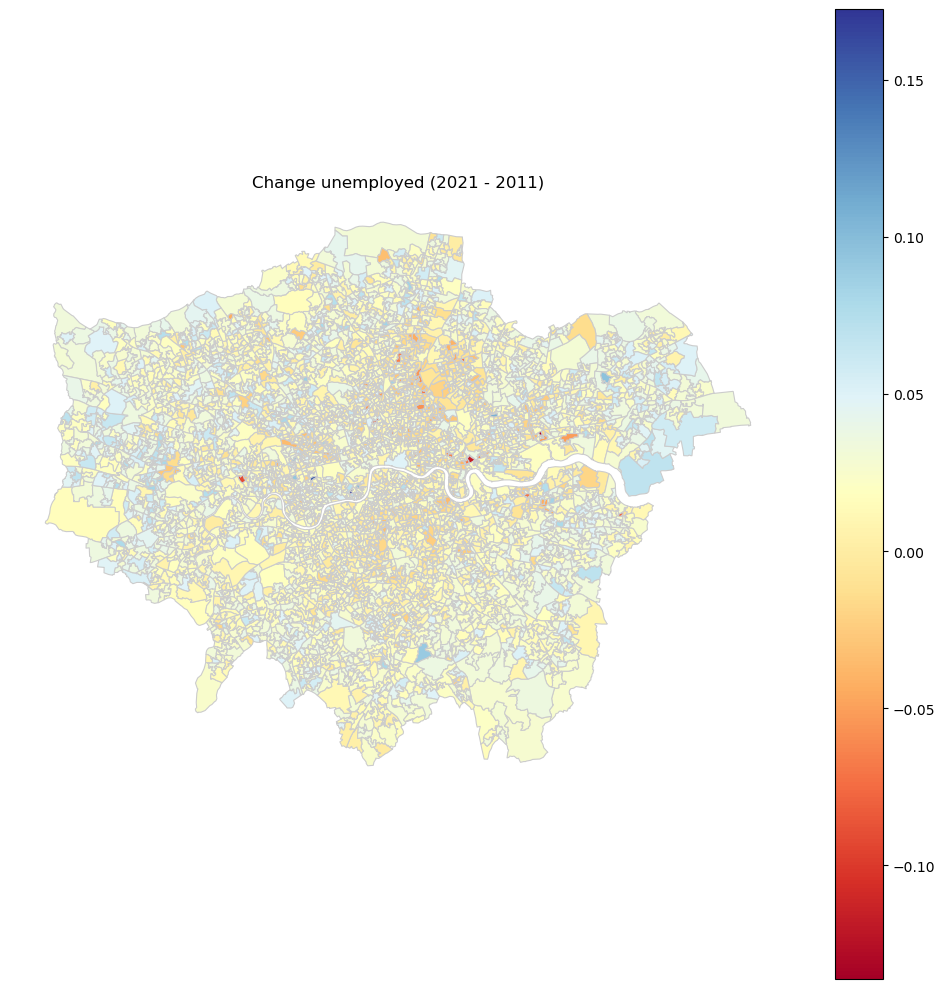

In [6]:
# 绘制2011年的地图
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='2011', cmap='Blues', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title('2011 unemployed')
ax1.set_axis_off()
plt.tight_layout()
plt.show()

# 绘制2021年的地图
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='2021', cmap='Greens', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('2021 unemployed')
ax2.set_axis_off()
plt.tight_layout()
plt.show()

# 绘制变化的地图
fig3, ax3 = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='change', cmap='RdYlBu', linewidth=0.8, ax=ax3, edgecolor='0.8', legend=True)
ax3.set_title('Change unemployed (2021 - 2011)')
ax3.set_axis_off()
plt.tight_layout()
plt.show()